# NIHCXR Clinical Drift Experiments Tutorial

## Import Libraries and Load NIHCXR Dataset

In [1]:
from functools import partial

from monai.transforms import AddChanneld, Compose, Lambdad, Resized, ToDeviced
from torchxrayvision.models import DenseNet

from cyclops.data.loader import load_nihcxr
from cyclops.data.slicer import SliceSpec
from cyclops.data.utils import apply_transforms
from cyclops.monitor import ClinicalShiftApplicator, Detector, Reductor, TSTester
from cyclops.monitor.plotter import plot_drift_experiment, plot_drift_timeseries
from cyclops.monitor.utils import get_device

device = get_device()

nih_ds = load_nihcxr("/mnt/data/clinical_datasets/NIHCXR")

/home/amritk/.cache/pypoetry/virtualenvs/pycyclops-mhx6UJW0-py3.9/lib/python3.9/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


## Example 1. Generate Source/Target Dataset for Experiments (1-2)

In [2]:
shifter = ClinicalShiftApplicator(
    "sex", source=None, target="F", shift_id="Patient Gender"
)
source_ds, target_ds = shifter.apply_shift(nih_ds, num_proc=6)

transforms = Compose(
    [
        AddChanneld(keys=("features",), allow_missing_keys=True),
        Resized(
            keys=("features",), spatial_size=(1, 224, 224), allow_missing_keys=True
        ),
        Lambdad(
            keys=("features",),
            func=lambda x: ((2 * (x / 255.0)) - 1.0) * 1024,
            allow_missing_keys=True,
        ),
        ToDeviced(keys=("features",), device=device, allow_missing_keys=True),
    ]
)

source_ds = source_ds.with_transform(
    partial(apply_transforms, transforms=transforms),
    columns=["features"],
    output_all_columns=True,
)
target_ds = target_ds.with_transform(
    partial(apply_transforms, transforms=transforms),
    columns=["features"],
    output_all_columns=True,
)

Filter (num_proc=6):   0%|          | 0/112120 [00:00<?, ? examples/s]

Filter (num_proc=6):  16%|█▌        | 18000/112120 [00:00<00:01, 61491.79 examples/s]

Filter (num_proc=6):  33%|███▎      | 37374/112120 [00:00<00:00, 95747.01 examples/s]

Filter (num_proc=6):  50%|█████     | 56061/112120 [00:00<00:00, 102348.31 examples/s]

Filter (num_proc=6):  67%|██████▋   | 74748/112120 [00:00<00:00, 118161.40 examples/s]

Filter (num_proc=6):  83%|████████▎ | 93434/112120 [00:00<00:00, 127317.23 examples/s]

Filter (num_proc=6): 100%|██████████| 112120/112120 [00:00<00:00, 131577.34 examples/s]

Filter (num_proc=6): 100%|██████████| 112120/112120 [00:01<00:00, 105917.24 examples/s]

Filter (num_proc=6):   0%|          | 0/112120 [00:00<?, ? examples/s]

Filter (num_proc=6):  17%|█▋        | 18687/112120 [00:00<00:01, 73171.76 examples/s]

Filter (num_proc=6):  33%|███▎      | 37374/112120 [00:00<00:00, 105281.65 examples/s]

Filter (num_proc=6):  50%|█████     | 56061/112120 [00:00<00:00, 115899.53 examples/s]

Filter (num_proc=6):  67%|██████▋   | 74748/112120 [00:00<00:00, 134492.26 examples/s]

Filter (num_proc=6):  83%|████████▎ | 93434/112120 [00:00<00:00, 135356.26 examples/s]

Filter (num_proc=6): 100%|██████████| 112120/112120 [00:00<00:00, 145589.69 examples/s]

Filter (num_proc=6): 100%|██████████| 112120/112120 [00:00<00:00, 117077.78 examples/s]

## Example 2. Sensitivity test experiment with 3 dimensionality reduction techniques


Map:   0%|          | 0/200 [00:00<?, ? examples/s]

Map:  16%|█▌        | 32/200 [00:01<00:09, 17.23 examples/s]

Map:  32%|███▏      | 64/200 [00:02<00:04, 30.12 examples/s]

Map:  48%|████▊     | 96/200 [00:02<00:02, 39.44 examples/s]

Map:  64%|██████▍   | 128/200 [00:03<00:01, 44.74 examples/s]

Map:  80%|████████  | 160/200 [00:03<00:00, 49.49 examples/s]

Map:  96%|█████████▌| 192/200 [00:04<00:00, 52.62 examples/s]

Map: 100%|██████████| 200/200 [00:04<00:00, 52.49 examples/s]

Map: 100%|██████████| 200/200 [00:04<00:00, 42.89 examples/s]

Map:   0%|          | 0/50 [00:00<?, ? examples/s]

Map:  64%|██████▍   | 32/50 [00:01<00:00, 18.80 examples/s]

Map: 100%|██████████| 50/50 [00:02<00:00, 26.69 examples/s]

Map: 100%|██████████| 50/50 [00:02<00:00, 24.64 examples/s]

Map:   0%|          | 0/100 [00:00<?, ? examples/s]

Map:  32%|███▏      | 32/100 [00:01<00:03, 18.65 examples/s]

Map:  64%|██████▍   | 64/100 [00:02<00:01, 31.64 examples/s]

Map:  96%|█████████▌| 96/100 [00:02<00:00, 39.92 examples/s]

Map: 100%|██████████| 100/100 [00:02<00:00, 34.63 examples/s]

Map:   0%|          | 0/200 [00:00<?, ? examples/s]

Map:  16%|█▌        | 32/200 [00:01<00:08, 19.01 examples/s]

Map:  32%|███▏      | 64/200 [00:02<00:04, 32.30 examples/s]

Map:  48%|████▊     | 96/200 [00:02<00:02, 40.87 examples/s]

Map:  64%|██████▍   | 128/200 [00:03<00:01, 47.13 examples/s]

Map:  80%|████████  | 160/200 [00:03<00:00, 50.98 examples/s]

Map:  96%|█████████▌| 192/200 [00:04<00:00, 53.10 examples/s]

Map: 100%|██████████| 200/200 [00:04<00:00, 52.59 examples/s]

Map: 100%|██████████| 200/200 [00:04<00:00, 44.40 examples/s]

Map:   0%|          | 0/200 [00:00<?, ? examples/s]

Map:  16%|█▌        | 32/200 [00:01<00:09, 18.33 examples/s]

Map:  32%|███▏      | 64/200 [00:02<00:04, 30.26 examples/s]

Map:  48%|████▊     | 96/200 [00:03<00:02, 35.30 examples/s]

Map:  64%|██████▍   | 128/200 [00:03<00:01, 40.29 examples/s]

Map:  80%|████████  | 160/200 [00:04<00:00, 44.13 examples/s]

Map:  96%|█████████▌| 192/200 [00:04<00:00, 45.59 examples/s]

Map: 100%|██████████| 200/200 [00:05<00:00, 45.11 examples/s]

Map: 100%|██████████| 200/200 [00:05<00:00, 39.00 examples/s]

Map:   0%|          | 0/50 [00:00<?, ? examples/s]

Map:  64%|██████▍   | 32/50 [00:02<00:01, 15.42 examples/s]

Map: 100%|██████████| 50/50 [00:02<00:00, 22.22 examples/s]

Map: 100%|██████████| 50/50 [00:02<00:00, 20.43 examples/s]

Map:   0%|          | 0/100 [00:00<?, ? examples/s]

Map:  32%|███▏      | 32/100 [00:01<00:04, 16.72 examples/s]

Map:  64%|██████▍   | 64/100 [00:02<00:01, 27.56 examples/s]

Map:  96%|█████████▌| 96/100 [00:03<00:00, 34.07 examples/s]

Map: 100%|██████████| 100/100 [00:03<00:00, 29.55 examples/s]

Map:   0%|          | 0/200 [00:00<?, ? examples/s]

Map:  16%|█▌        | 32/200 [00:01<00:10, 16.29 examples/s]

Map:  32%|███▏      | 64/200 [00:02<00:04, 27.52 examples/s]

Map:  48%|████▊     | 96/200 [00:03<00:02, 34.77 examples/s]

Map:  64%|██████▍   | 128/200 [00:03<00:01, 39.62 examples/s]

Map:  80%|████████  | 160/200 [00:04<00:00, 42.95 examples/s]

Map:  96%|█████████▌| 192/200 [00:05<00:00, 44.60 examples/s]

Map: 100%|██████████| 200/200 [00:05<00:00, 44.08 examples/s]

Map: 100%|██████████| 200/200 [00:05<00:00, 37.48 examples/s]

Map:   0%|          | 0/200 [00:00<?, ? examples/s]

Map:  16%|█▌        | 32/200 [00:01<00:09, 17.53 examples/s]

Map:  32%|███▏      | 64/200 [00:02<00:04, 29.54 examples/s]

Map:  48%|████▊     | 96/200 [00:02<00:02, 37.36 examples/s]

Map:  64%|██████▍   | 128/200 [00:03<00:01, 43.25 examples/s]

Map:  80%|████████  | 160/200 [00:04<00:00, 47.23 examples/s]

Map:  96%|█████████▌| 192/200 [00:04<00:00, 49.27 examples/s]

Map: 100%|██████████| 200/200 [00:04<00:00, 48.87 examples/s]

Map: 100%|██████████| 200/200 [00:04<00:00, 40.99 examples/s]

Map:   0%|          | 0/50 [00:00<?, ? examples/s]

Map:  64%|██████▍   | 32/50 [00:01<00:01, 17.64 examples/s]

Map: 100%|██████████| 50/50 [00:02<00:00, 25.18 examples/s]

Map: 100%|██████████| 50/50 [00:02<00:00, 23.21 examples/s]

Map:   0%|          | 0/100 [00:00<?, ? examples/s]

Map:  32%|███▏      | 32/100 [00:01<00:03, 17.00 examples/s]

Map:  64%|██████▍   | 64/100 [00:02<00:01, 28.46 examples/s]

Map:  96%|█████████▌| 96/100 [00:03<00:00, 36.36 examples/s]

Map: 100%|██████████| 100/100 [00:03<00:00, 31.42 examples/s]

Map:   0%|          | 0/200 [00:00<?, ? examples/s]

Map:  16%|█▌        | 32/200 [00:01<00:09, 17.53 examples/s]

Map:  32%|███▏      | 64/200 [00:02<00:04, 28.97 examples/s]

Map:  48%|████▊     | 96/200 [00:03<00:02, 36.54 examples/s]

Map:  64%|██████▍   | 128/200 [00:03<00:01, 42.11 examples/s]

Map:  80%|████████  | 160/200 [00:04<00:00, 45.56 examples/s]

Map:  96%|█████████▌| 192/200 [00:04<00:00, 47.20 examples/s]

Map: 100%|██████████| 200/200 [00:05<00:00, 47.30 examples/s]

Map: 100%|██████████| 200/200 [00:05<00:00, 39.90 examples/s]

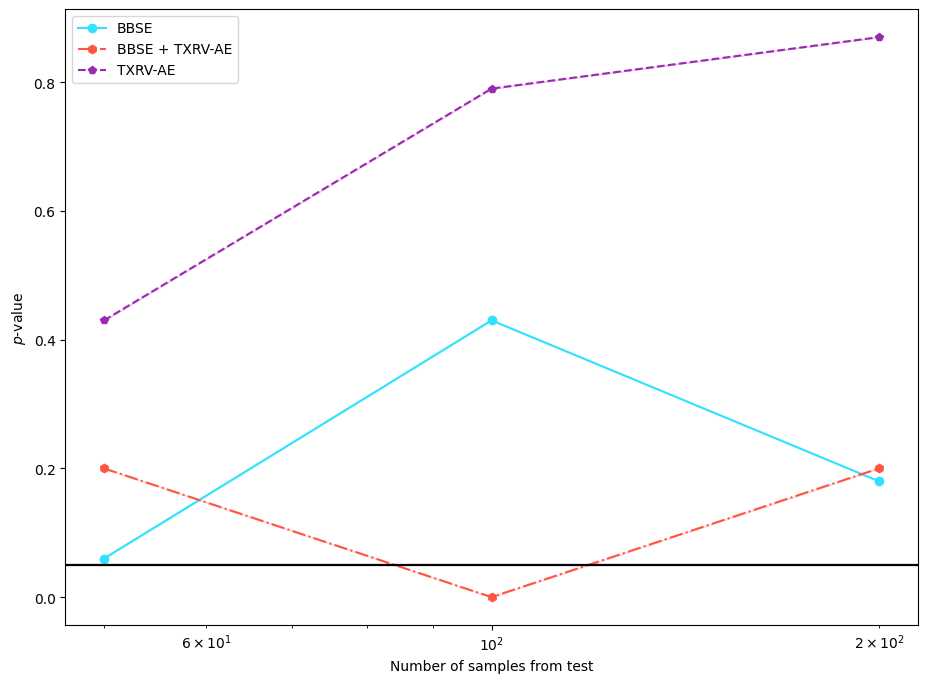

In [3]:
model = DenseNet(weights="densenet121-res224-all")
dr_methods = {
    "BBSE": "bbse-soft",
    "BBSE + TXRV-AE": "bbse-soft+txrv-ae",
    "TXRV-AE": "txrv-ae",
}
results = {}

for name, dr_method in dr_methods.items():
    if name == "TXRV-AE":
        reductor = Reductor(dr_method=dr_method, device=device)
    else:
        reductor = Reductor(dr_method=dr_method, model=model, device=device)
    detector = Detector(
        "sensitivity_test",
        reductor=reductor,
        tester=TSTester(tester_method="mmd"),
        source_sample_size=200,
        target_sample_size=[50, 100, 200],
        num_runs=1,
    )
    result = detector.detect_shift(source_ds, target_ds)
    results[name] = result
plot_drift_experiment(results)

## Example 3. Sensitivity test experiment with models trained on different datasets

Map:   0%|          | 0/200 [00:00<?, ? examples/s]

Map:  16%|█▌        | 32/200 [00:01<00:09, 17.53 examples/s]

Map:  32%|███▏      | 64/200 [00:02<00:04, 29.76 examples/s]

Map:  48%|████▊     | 96/200 [00:02<00:02, 38.26 examples/s]

Map:  64%|██████▍   | 128/200 [00:03<00:01, 44.20 examples/s]

Map:  80%|████████  | 160/200 [00:04<00:00, 48.75 examples/s]

Map:  96%|█████████▌| 192/200 [00:04<00:00, 50.44 examples/s]

Map: 100%|██████████| 200/200 [00:04<00:00, 50.14 examples/s]

Map: 100%|██████████| 200/200 [00:04<00:00, 41.83 examples/s]

Map:   0%|          | 0/50 [00:00<?, ? examples/s]

Map:  64%|██████▍   | 32/50 [00:01<00:01, 17.45 examples/s]

Map: 100%|██████████| 50/50 [00:02<00:00, 24.84 examples/s]

Map: 100%|██████████| 50/50 [00:02<00:00, 22.90 examples/s]

Map:   0%|          | 0/100 [00:00<?, ? examples/s]

Map:  32%|███▏      | 32/100 [00:01<00:04, 16.38 examples/s]

Map:  64%|██████▍   | 64/100 [00:02<00:01, 27.95 examples/s]

Map:  96%|█████████▌| 96/100 [00:03<00:00, 36.15 examples/s]

Map: 100%|██████████| 100/100 [00:03<00:00, 30.98 examples/s]

Map:   0%|          | 0/200 [00:00<?, ? examples/s]

Map:  16%|█▌        | 32/200 [00:03<00:16, 10.01 examples/s]

Map:  32%|███▏      | 64/200 [00:04<00:08, 15.27 examples/s]

Map:  48%|████▊     | 96/200 [00:06<00:06, 16.18 examples/s]

Map:  64%|██████▍   | 128/200 [00:08<00:04, 16.71 examples/s]

Map:  80%|████████  | 160/200 [00:09<00:02, 18.86 examples/s]

Map:  96%|█████████▌| 192/200 [00:11<00:00, 19.44 examples/s]

Map: 100%|██████████| 200/200 [00:11<00:00, 18.46 examples/s]

Map: 100%|██████████| 200/200 [00:11<00:00, 17.16 examples/s]

Map:   0%|          | 0/200 [00:00<?, ? examples/s]

Map:  16%|█▌        | 32/200 [00:01<00:09, 18.30 examples/s]

Map:  32%|███▏      | 64/200 [00:02<00:04, 30.57 examples/s]

Map:  48%|████▊     | 96/200 [00:02<00:02, 38.84 examples/s]

Map:  64%|██████▍   | 128/200 [00:03<00:01, 44.70 examples/s]

Map:  80%|████████  | 160/200 [00:03<00:00, 49.30 examples/s]

Map:  96%|█████████▌| 192/200 [00:04<00:00, 52.08 examples/s]

Map: 100%|██████████| 200/200 [00:04<00:00, 51.72 examples/s]

Map: 100%|██████████| 200/200 [00:04<00:00, 42.92 examples/s]

Map:   0%|          | 0/50 [00:00<?, ? examples/s]

Map:  64%|██████▍   | 32/50 [00:01<00:01, 17.10 examples/s]

Map: 100%|██████████| 50/50 [00:02<00:00, 24.44 examples/s]

Map: 100%|██████████| 50/50 [00:02<00:00, 22.51 examples/s]

Map:   0%|          | 0/100 [00:00<?, ? examples/s]

Map:  32%|███▏      | 32/100 [00:03<00:06, 10.17 examples/s]

Map:  64%|██████▍   | 64/100 [00:05<00:03, 11.46 examples/s]

Map:  96%|█████████▌| 96/100 [00:07<00:00, 13.00 examples/s]

Map: 100%|██████████| 100/100 [00:07<00:00, 13.45 examples/s]

Map: 100%|██████████| 100/100 [00:07<00:00, 12.60 examples/s]

Map:   0%|          | 0/200 [00:00<?, ? examples/s]

Map:  16%|█▌        | 32/200 [00:03<00:17,  9.40 examples/s]

Map:  32%|███▏      | 64/200 [00:05<00:10, 12.98 examples/s]

Map:  48%|████▊     | 96/200 [00:05<00:05, 18.97 examples/s]

Map:  64%|██████▍   | 128/200 [00:06<00:02, 24.65 examples/s]

Map:  80%|████████  | 160/200 [00:07<00:01, 30.51 examples/s]

Map:  96%|█████████▌| 192/200 [00:08<00:00, 33.35 examples/s]

Map: 100%|██████████| 200/200 [00:08<00:00, 34.31 examples/s]

Map: 100%|██████████| 200/200 [00:08<00:00, 24.23 examples/s]

Map:   0%|          | 0/200 [00:00<?, ? examples/s]

Map:  16%|█▌        | 32/200 [00:01<00:09, 17.28 examples/s]

Map:  32%|███▏      | 64/200 [00:02<00:04, 28.52 examples/s]

Map:  48%|████▊     | 96/200 [00:03<00:02, 36.09 examples/s]

Map:  64%|██████▍   | 128/200 [00:03<00:01, 42.25 examples/s]

Map:  80%|████████  | 160/200 [00:04<00:00, 47.14 examples/s]

Map:  96%|█████████▌| 192/200 [00:04<00:00, 50.64 examples/s]

Map: 100%|██████████| 200/200 [00:04<00:00, 50.53 examples/s]

Map: 100%|██████████| 200/200 [00:04<00:00, 41.00 examples/s]

Map:   0%|          | 0/50 [00:00<?, ? examples/s]

Map:  64%|██████▍   | 32/50 [00:02<00:01, 15.38 examples/s]

Map: 100%|██████████| 50/50 [00:02<00:00, 21.95 examples/s]

Map: 100%|██████████| 50/50 [00:02<00:00, 20.24 examples/s]

Map:   0%|          | 0/100 [00:00<?, ? examples/s]

Map:  32%|███▏      | 32/100 [00:01<00:03, 18.75 examples/s]

Map:  64%|██████▍   | 64/100 [00:02<00:01, 29.05 examples/s]

Map:  96%|█████████▌| 96/100 [00:02<00:00, 37.97 examples/s]

Map: 100%|██████████| 100/100 [00:03<00:00, 33.02 examples/s]

Map:   0%|          | 0/200 [00:00<?, ? examples/s]

Map:  16%|█▌        | 32/200 [00:02<00:10, 15.69 examples/s]

Map:  32%|███▏      | 64/200 [00:02<00:05, 25.93 examples/s]

Map:  48%|████▊     | 96/200 [00:03<00:03, 34.45 examples/s]

Map:  64%|██████▍   | 128/200 [00:03<00:01, 41.11 examples/s]

Map:  80%|████████  | 160/200 [00:04<00:00, 46.28 examples/s]

Map:  96%|█████████▌| 192/200 [00:04<00:00, 49.05 examples/s]

Map: 100%|██████████| 200/200 [00:05<00:00, 48.05 examples/s]

Map: 100%|██████████| 200/200 [00:05<00:00, 38.93 examples/s]

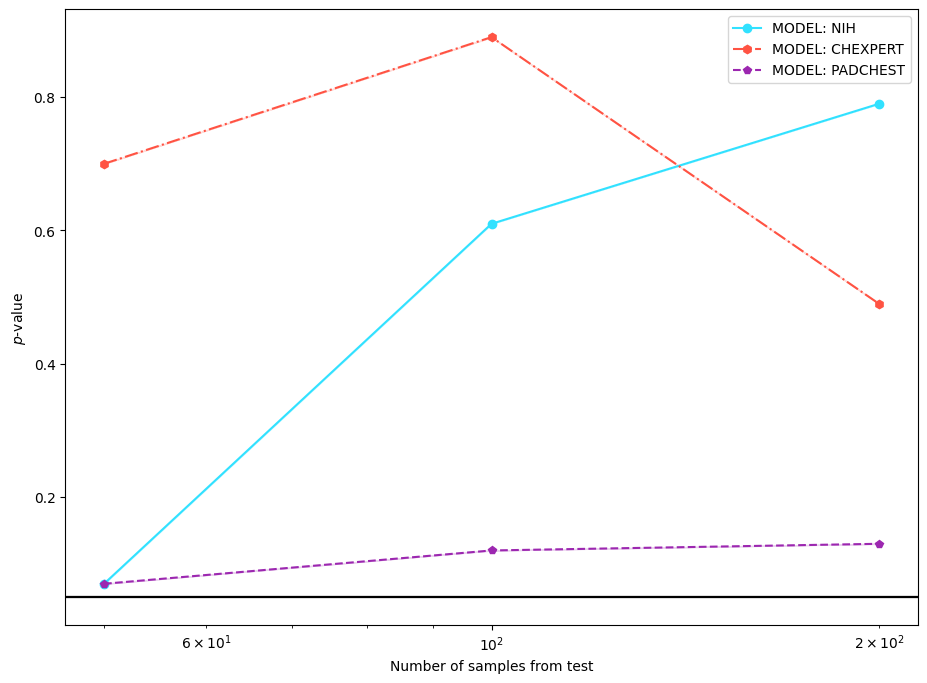

In [4]:
models = {
    "MODEL: NIH": "densenet121-res224-nih",
    "MODEL: CHEXPERT": "densenet121-res224-chex",
    "MODEL: PADCHEST": "densenet121-res224-pc",
}
results = {}

for model_name, model in models.items():
    detector = Detector(
        "sensitivity_test",
        reductor=Reductor(
            dr_method="bbse-soft", model=DenseNet(weights=model), device=device
        ),
        tester=TSTester(tester_method="mmd"),
        source_sample_size=200,
        target_sample_size=[50, 100, 200],
        num_runs=1,
    )
    results[model_name] = detector.detect_shift(source_ds, target_ds)
plot_drift_experiment(results)

## Example 4. Sensitivity test experiment with different clinical shifts

Filter (num_proc=6):   0%|          | 0/112120 [00:00<?, ? examples/s]

Filter (num_proc=6):  17%|█▋        | 18687/112120 [00:00<00:01, 49701.65 examples/s]

Filter (num_proc=6):  33%|███▎      | 37374/112120 [00:00<00:01, 73169.98 examples/s]

Filter (num_proc=6):  50%|█████     | 56061/112120 [00:00<00:00, 89565.24 examples/s]

Filter (num_proc=6):  67%|██████▋   | 74748/112120 [00:00<00:00, 96404.11 examples/s]

Filter (num_proc=6):  83%|████████▎ | 93434/112120 [00:01<00:00, 104434.03 examples/s]

Filter (num_proc=6): 100%|██████████| 112120/112120 [00:01<00:00, 107167.43 examples/s]

Filter (num_proc=6): 100%|██████████| 112120/112120 [00:01<00:00, 84920.18 examples/s] 

Filter (num_proc=6):   0%|          | 0/112120 [00:00<?, ? examples/s]

Filter (num_proc=6):  17%|█▋        | 18687/112120 [00:00<00:01, 50500.77 examples/s]

Filter (num_proc=6):  33%|███▎      | 37374/112120 [00:00<00:01, 71659.24 examples/s]

Filter (num_proc=6):  45%|████▍     | 50374/112120 [00:00<00:00, 69056.71 examples/s]

Filter (num_proc=6):  67%|██████▋   | 74748/112120 [00:00<00:00, 89383.85 examples/s]

Filter (num_proc=6):  83%|████████▎ | 93434/112120 [00:01<00:00, 97739.50 examples/s]

Filter (num_proc=6): 100%|██████████| 112120/112120 [00:01<00:00, 102841.20 examples/s]

Filter (num_proc=6): 100%|██████████| 112120/112120 [00:01<00:00, 79894.84 examples/s] 

Map:   0%|          | 0/200 [00:00<?, ? examples/s]

Map:  16%|█▌        | 32/200 [00:01<00:08, 18.89 examples/s]

Map:  32%|███▏      | 64/200 [00:02<00:04, 32.21 examples/s]

Map:  48%|████▊     | 96/200 [00:02<00:02, 41.52 examples/s]

Map:  64%|██████▍   | 128/200 [00:03<00:01, 48.14 examples/s]

Map:  80%|████████  | 160/200 [00:03<00:00, 52.31 examples/s]

Map:  96%|█████████▌| 192/200 [00:04<00:00, 53.95 examples/s]

Map: 100%|██████████| 200/200 [00:04<00:00, 53.13 examples/s]

Map: 100%|██████████| 200/200 [00:04<00:00, 44.89 examples/s]

Map:   0%|          | 0/50 [00:00<?, ? examples/s]

Map:  64%|██████▍   | 32/50 [00:01<00:00, 18.77 examples/s]

Map: 100%|██████████| 50/50 [00:02<00:00, 26.36 examples/s]

Map: 100%|██████████| 50/50 [00:02<00:00, 24.39 examples/s]

Map:   0%|          | 0/100 [00:00<?, ? examples/s]

Map:  32%|███▏      | 32/100 [00:01<00:03, 18.41 examples/s]

Map:  64%|██████▍   | 64/100 [00:02<00:01, 31.06 examples/s]

Map:  96%|█████████▌| 96/100 [00:02<00:00, 39.67 examples/s]

Map: 100%|██████████| 100/100 [00:02<00:00, 34.09 examples/s]

Map:   0%|          | 0/200 [00:00<?, ? examples/s]

Map:  16%|█▌        | 32/200 [00:01<00:09, 18.33 examples/s]

Map:  32%|███▏      | 64/200 [00:02<00:04, 30.82 examples/s]

Map:  48%|████▊     | 96/200 [00:02<00:02, 36.71 examples/s]

Map:  64%|██████▍   | 128/200 [00:03<00:01, 43.43 examples/s]

Map:  80%|████████  | 160/200 [00:04<00:00, 41.40 examples/s]

Map:  96%|█████████▌| 192/200 [00:04<00:00, 43.99 examples/s]

Map: 100%|██████████| 200/200 [00:05<00:00, 40.61 examples/s]

Map: 100%|██████████| 200/200 [00:05<00:00, 37.77 examples/s]

Filter (num_proc=6):   0%|          | 0/112120 [00:00<?, ? examples/s]

Filter (num_proc=6):  17%|█▋        | 18687/112120 [00:00<00:01, 52289.49 examples/s]

Filter (num_proc=6):  33%|███▎      | 37374/112120 [00:00<00:01, 74137.79 examples/s]

Filter (num_proc=6):  50%|█████     | 56061/112120 [00:00<00:00, 84806.23 examples/s]

Filter (num_proc=6):  67%|██████▋   | 74748/112120 [00:00<00:00, 94132.84 examples/s]

Filter (num_proc=6):  83%|████████▎ | 93434/112120 [00:01<00:00, 86960.53 examples/s]

Filter (num_proc=6): 100%|██████████| 112120/112120 [00:01<00:00, 83005.15 examples/s]

Filter (num_proc=6):   0%|          | 0/112120 [00:00<?, ? examples/s]

Filter (num_proc=6):  17%|█▋        | 18687/112120 [00:00<00:01, 50351.02 examples/s]

Filter (num_proc=6):  33%|███▎      | 37374/112120 [00:00<00:00, 75463.42 examples/s]

Filter (num_proc=6):  43%|████▎     | 48374/112120 [00:00<00:00, 65723.21 examples/s]

Filter (num_proc=6):  60%|█████▉    | 67061/112120 [00:00<00:00, 83287.28 examples/s]

Filter (num_proc=6):  83%|████████▎ | 93434/112120 [00:01<00:00, 112720.77 examples/s]

Filter (num_proc=6): 100%|██████████| 112120/112120 [00:01<00:00, 113545.41 examples/s]

Filter (num_proc=6): 100%|██████████| 112120/112120 [00:01<00:00, 84028.49 examples/s] 

Map:   0%|          | 0/200 [00:00<?, ? examples/s]

Map:  16%|█▌        | 32/200 [00:02<00:12, 13.90 examples/s]

Map:  32%|███▏      | 64/200 [00:02<00:05, 25.39 examples/s]

Map:  48%|████▊     | 96/200 [00:03<00:03, 34.41 examples/s]

Map:  64%|██████▍   | 128/200 [00:03<00:01, 42.12 examples/s]

Map:  80%|████████  | 160/200 [00:04<00:00, 47.54 examples/s]

Map:  96%|█████████▌| 192/200 [00:04<00:00, 51.82 examples/s]

Map: 100%|██████████| 200/200 [00:05<00:00, 51.84 examples/s]

Map: 100%|██████████| 200/200 [00:05<00:00, 39.55 examples/s]

Map:   0%|          | 0/50 [00:00<?, ? examples/s]

Map:  64%|██████▍   | 32/50 [00:01<00:00, 18.31 examples/s]

Map: 100%|██████████| 50/50 [00:02<00:00, 26.39 examples/s]

Map: 100%|██████████| 50/50 [00:02<00:00, 24.27 examples/s]

Map:   0%|          | 0/100 [00:00<?, ? examples/s]

Map:  32%|███▏      | 32/100 [00:02<00:05, 12.96 examples/s]

Map:  64%|██████▍   | 64/100 [00:03<00:01, 24.00 examples/s]

Map:  96%|█████████▌| 96/100 [00:03<00:00, 30.06 examples/s]

Map: 100%|██████████| 100/100 [00:03<00:00, 25.90 examples/s]

Map:   0%|          | 0/200 [00:00<?, ? examples/s]

Map:  16%|█▌        | 32/200 [00:01<00:10, 16.31 examples/s]

Map:  32%|███▏      | 64/200 [00:02<00:04, 28.40 examples/s]

Map:  48%|████▊     | 96/200 [00:03<00:02, 36.81 examples/s]

Map:  64%|██████▍   | 128/200 [00:03<00:01, 39.80 examples/s]

Map:  80%|████████  | 160/200 [00:04<00:00, 44.54 examples/s]

Map:  96%|█████████▌| 192/200 [00:04<00:00, 48.22 examples/s]

Map: 100%|██████████| 200/200 [00:05<00:00, 48.09 examples/s]

Map: 100%|██████████| 200/200 [00:05<00:00, 39.45 examples/s]

Filter (num_proc=6):   0%|          | 0/112120 [00:00<?, ? examples/s]

Filter (num_proc=6):  17%|█▋        | 18687/112120 [00:00<00:01, 54215.76 examples/s]

Filter (num_proc=6):  33%|███▎      | 37374/112120 [00:00<00:00, 77850.12 examples/s]

Filter (num_proc=6):  50%|█████     | 56061/112120 [00:00<00:00, 89833.05 examples/s]

Filter (num_proc=6):  67%|██████▋   | 74748/112120 [00:00<00:00, 98999.80 examples/s]

Filter (num_proc=6):  83%|████████▎ | 93434/112120 [00:01<00:00, 103271.21 examples/s]

Filter (num_proc=6): 100%|██████████| 112120/112120 [00:01<00:00, 104587.58 examples/s]

Filter (num_proc=6): 100%|██████████| 112120/112120 [00:01<00:00, 84762.37 examples/s] 

Filter (num_proc=6):   0%|          | 0/112120 [00:00<?, ? examples/s]

Filter (num_proc=6):  17%|█▋        | 18687/112120 [00:00<00:02, 42133.38 examples/s]

Filter (num_proc=6):  33%|███▎      | 37374/112120 [00:00<00:01, 65941.81 examples/s]

Filter (num_proc=6):  50%|█████     | 56061/112120 [00:00<00:00, 80985.95 examples/s]

Filter (num_proc=6):  67%|██████▋   | 74748/112120 [00:00<00:00, 92137.63 examples/s]

Filter (num_proc=6):  83%|████████▎ | 93434/112120 [00:01<00:00, 96964.06 examples/s]

Filter (num_proc=6): 100%|██████████| 112120/112120 [00:01<00:00, 106786.16 examples/s]

Filter (num_proc=6): 100%|██████████| 112120/112120 [00:01<00:00, 79795.07 examples/s] 

Map:   0%|          | 0/200 [00:00<?, ? examples/s]

Map:  16%|█▌        | 32/200 [00:01<00:08, 18.81 examples/s]

Map:  32%|███▏      | 64/200 [00:02<00:04, 32.48 examples/s]

Map:  48%|████▊     | 96/200 [00:02<00:02, 41.52 examples/s]

Map:  64%|██████▍   | 128/200 [00:03<00:01, 45.99 examples/s]

Map:  80%|████████  | 160/200 [00:03<00:00, 48.72 examples/s]

Map:  96%|█████████▌| 192/200 [00:04<00:00, 49.13 examples/s]

Map: 100%|██████████| 200/200 [00:04<00:00, 48.38 examples/s]

Map: 100%|██████████| 200/200 [00:04<00:00, 42.50 examples/s]

Map:   0%|          | 0/50 [00:00<?, ? examples/s]

Map:  64%|██████▍   | 32/50 [00:01<00:01, 16.52 examples/s]

Map: 100%|██████████| 50/50 [00:02<00:00, 24.16 examples/s]

Map: 100%|██████████| 50/50 [00:02<00:00, 22.14 examples/s]

Map:   0%|          | 0/100 [00:00<?, ? examples/s]

Map:  32%|███▏      | 32/100 [00:02<00:04, 15.52 examples/s]

Map:  64%|██████▍   | 64/100 [00:02<00:01, 26.07 examples/s]

Map:  96%|█████████▌| 96/100 [00:03<00:00, 33.93 examples/s]

Map: 100%|██████████| 100/100 [00:03<00:00, 27.97 examples/s]

Map:   0%|          | 0/200 [00:00<?, ? examples/s]

Map:  16%|█▌        | 32/200 [00:02<00:11, 15.04 examples/s]

Map:  32%|███▏      | 64/200 [00:02<00:05, 26.13 examples/s]

Map:  48%|████▊     | 96/200 [00:03<00:03, 33.24 examples/s]

Map:  64%|██████▍   | 128/200 [00:03<00:01, 39.76 examples/s]

Map:  80%|████████  | 160/200 [00:04<00:00, 44.69 examples/s]

Map:  96%|█████████▌| 192/200 [00:05<00:00, 48.69 examples/s]

Map: 100%|██████████| 200/200 [00:05<00:00, 48.62 examples/s]

Map: 100%|██████████| 200/200 [00:05<00:00, 38.41 examples/s]

Filter (num_proc=6):   0%|          | 0/112120 [00:00<?, ? examples/s]

Filter (num_proc=6):  17%|█▋        | 18687/112120 [00:00<00:01, 50518.96 examples/s]

Filter (num_proc=6):  33%|███▎      | 37374/112120 [00:00<00:01, 68955.85 examples/s]

Filter (num_proc=6):  50%|█████     | 56061/112120 [00:00<00:00, 82998.19 examples/s]

Filter (num_proc=6):  66%|██████▌   | 74061/112120 [00:00<00:00, 86997.09 examples/s]

Filter (num_proc=6):  83%|████████▎ | 93434/112120 [00:01<00:00, 101284.87 examples/s]

Filter (num_proc=6): 100%|██████████| 112120/112120 [00:01<00:00, 107614.71 examples/s]

Filter (num_proc=6): 100%|██████████| 112120/112120 [00:01<00:00, 82830.33 examples/s] 

Filter (num_proc=6):   0%|          | 0/112120 [00:00<?, ? examples/s]

Filter (num_proc=6):  17%|█▋        | 18687/112120 [00:00<00:01, 51338.77 examples/s]

Filter (num_proc=6):  33%|███▎      | 37374/112120 [00:00<00:01, 74295.52 examples/s]

Filter (num_proc=6):  50%|█████     | 56061/112120 [00:00<00:00, 84450.82 examples/s]

Filter (num_proc=6):  67%|██████▋   | 74748/112120 [00:00<00:00, 95684.75 examples/s]

Filter (num_proc=6):  83%|████████▎ | 93434/112120 [00:01<00:00, 96563.26 examples/s]

Filter (num_proc=6): 100%|██████████| 112120/112120 [00:01<00:00, 105384.73 examples/s]

Filter (num_proc=6): 100%|██████████| 112120/112120 [00:01<00:00, 82838.73 examples/s] 

Map:   0%|          | 0/200 [00:00<?, ? examples/s]

Map:  16%|█▌        | 32/200 [00:01<00:09, 18.02 examples/s]

Map:  32%|███▏      | 64/200 [00:02<00:04, 30.44 examples/s]

Map:  48%|████▊     | 96/200 [00:02<00:02, 39.07 examples/s]

Map:  64%|██████▍   | 128/200 [00:03<00:01, 45.68 examples/s]

Map:  80%|████████  | 160/200 [00:03<00:00, 51.30 examples/s]

Map:  96%|█████████▌| 192/200 [00:04<00:00, 54.26 examples/s]

Map: 100%|██████████| 200/200 [00:04<00:00, 53.69 examples/s]

Map: 100%|██████████| 200/200 [00:04<00:00, 43.86 examples/s]

Map:   0%|          | 0/50 [00:00<?, ? examples/s]

Map:  64%|██████▍   | 32/50 [00:01<00:00, 18.40 examples/s]

Map: 100%|██████████| 50/50 [00:02<00:00, 26.58 examples/s]

Map: 100%|██████████| 50/50 [00:02<00:00, 24.43 examples/s]

Map:   0%|          | 0/100 [00:00<?, ? examples/s]

Map:  32%|███▏      | 32/100 [00:01<00:03, 19.26 examples/s]

Map:  64%|██████▍   | 64/100 [00:02<00:01, 32.37 examples/s]

Map:  96%|█████████▌| 96/100 [00:02<00:00, 41.08 examples/s]

Map: 100%|██████████| 100/100 [00:02<00:00, 35.53 examples/s]

Map:   0%|          | 0/200 [00:00<?, ? examples/s]

Map:  16%|█▌        | 32/200 [00:01<00:09, 17.64 examples/s]

Map:  32%|███▏      | 64/200 [00:02<00:04, 29.35 examples/s]

Map:  48%|████▊     | 96/200 [00:03<00:02, 36.53 examples/s]

Map:  64%|██████▍   | 128/200 [00:03<00:01, 43.20 examples/s]

Map:  80%|████████  | 160/200 [00:04<00:00, 48.90 examples/s]

Map:  96%|█████████▌| 192/200 [00:04<00:00, 51.75 examples/s]

Map: 100%|██████████| 200/200 [00:04<00:00, 51.28 examples/s]

Map: 100%|██████████| 200/200 [00:04<00:00, 41.88 examples/s]

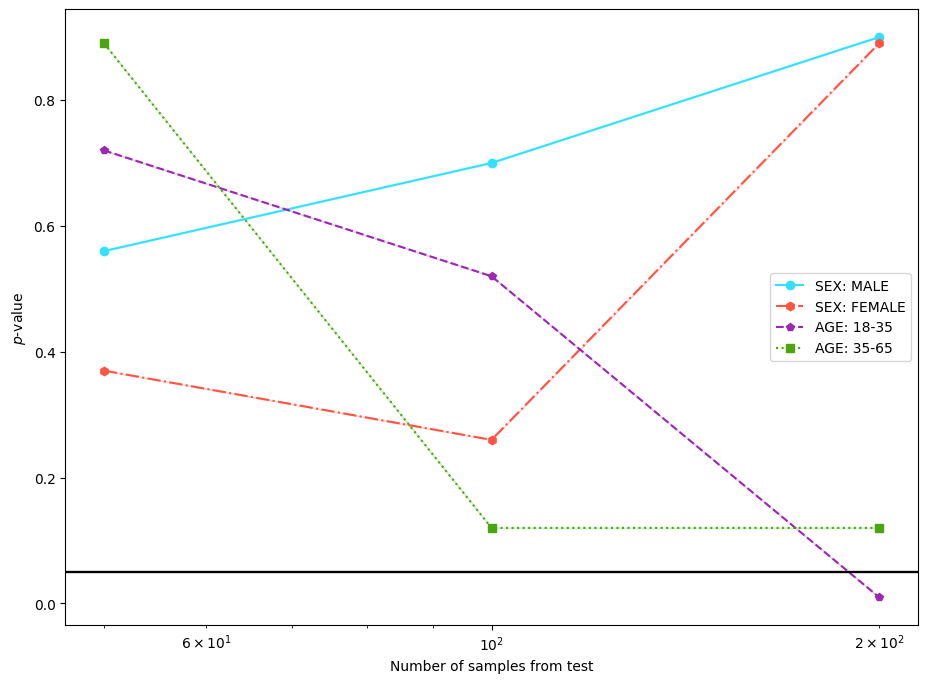

In [5]:
model = DenseNet(weights="densenet121-res224-all")
source_slice = None
target_slices = {
    "SEX: MALE": SliceSpec(spec_list=[{"Patient Gender": {"value": "M"}}]),
    "SEX: FEMALE": SliceSpec(spec_list=[{"Patient Gender": {"value": "F"}}]),
    "AGE: 18-35": SliceSpec(
        spec_list=[{"Patient Age": {"min_value": 18, "max_value": 35}}]
    ),
    "AGE: 35-65": SliceSpec(
        spec_list=[{"Patient Age": {"min_value": 35, "max_value": 65}}]
    ),
}
results = {}

for name, target_slice in target_slices.items():
    source_slice = None
    shifter = ClinicalShiftApplicator(
        "custom", source=source_slice, target=target_slice
    )
    ds_source, ds_target = shifter.apply_shift(nih_ds, num_proc=6)

    ds_source = ds_source.with_transform(
        partial(apply_transforms, transforms=transforms),
        columns=["features"],
        output_all_columns=True,
    )
    ds_target = ds_target.with_transform(
        partial(apply_transforms, transforms=transforms),
        columns=["features"],
        output_all_columns=True,
    )

    detector = Detector(
        "sensitivity_test",
        reductor=Reductor(dr_method="bbse-soft", model=model, device=device),
        tester=TSTester(tester_method="mmd"),
        source_sample_size=200,
        target_sample_size=[50, 100, 200],
        num_runs=1,
    )
    results[name] = detector.detect_shift(ds_source, ds_target)
plot_drift_experiment(results)

## Example 5. Rolling window experiment with synthetic timestamps using biweekly window

Map:   0%|          | 0/200 [00:00<?, ? examples/s]

Map:  16%|█▌        | 32/200 [00:01<00:08, 19.16 examples/s]

Map:  32%|███▏      | 64/200 [00:02<00:04, 32.64 examples/s]

Map:  48%|████▊     | 96/200 [00:02<00:02, 41.89 examples/s]

Map:  64%|██████▍   | 128/200 [00:03<00:01, 48.84 examples/s]

Map:  80%|████████  | 160/200 [00:03<00:00, 53.63 examples/s]

Map:  96%|█████████▌| 192/200 [00:04<00:00, 55.99 examples/s]

Map: 100%|██████████| 200/200 [00:04<00:00, 55.56 examples/s]

Map: 100%|██████████| 200/200 [00:04<00:00, 46.12 examples/s]

Map:   0%|          | 0/50 [00:00<?, ? examples/s]

Map:  64%|██████▍   | 32/50 [00:01<00:00, 18.75 examples/s]

Map: 100%|██████████| 50/50 [00:02<00:00, 26.81 examples/s]

Map: 100%|██████████| 50/50 [00:02<00:00, 24.70 examples/s]

Map:   0%|          | 0/50 [00:00<?, ? examples/s]

Map:  64%|██████▍   | 32/50 [00:01<00:01, 17.09 examples/s]

Map: 100%|██████████| 50/50 [00:02<00:00, 24.61 examples/s]

Map: 100%|██████████| 50/50 [00:02<00:00, 22.63 examples/s]

Map:   0%|          | 0/50 [00:00<?, ? examples/s]

Map:  64%|██████▍   | 32/50 [00:01<00:00, 18.34 examples/s]

Map: 100%|██████████| 50/50 [00:02<00:00, 26.06 examples/s]

Map: 100%|██████████| 50/50 [00:02<00:00, 24.05 examples/s]

Map:   0%|          | 0/50 [00:00<?, ? examples/s]

Map:  64%|██████▍   | 32/50 [00:01<00:00, 18.44 examples/s]

Map: 100%|██████████| 50/50 [00:02<00:00, 26.24 examples/s]

Map: 100%|██████████| 50/50 [00:02<00:00, 24.20 examples/s]

Map:   0%|          | 0/50 [00:00<?, ? examples/s]

Map:  64%|██████▍   | 32/50 [00:01<00:00, 18.81 examples/s]

Map: 100%|██████████| 50/50 [00:02<00:00, 26.97 examples/s]

Map: 100%|██████████| 50/50 [00:02<00:00, 24.83 examples/s]

Map:   0%|          | 0/50 [00:00<?, ? examples/s]

Map:  64%|██████▍   | 32/50 [00:01<00:00, 18.45 examples/s]

Map: 100%|██████████| 50/50 [00:02<00:00, 26.27 examples/s]

Map: 100%|██████████| 50/50 [00:02<00:00, 24.23 examples/s]

Map:   0%|          | 0/50 [00:00<?, ? examples/s]

Map:  64%|██████▍   | 32/50 [00:01<00:00, 18.19 examples/s]

Map: 100%|██████████| 50/50 [00:02<00:00, 25.63 examples/s]

Map: 100%|██████████| 50/50 [00:02<00:00, 23.70 examples/s]

Map:   0%|          | 0/50 [00:00<?, ? examples/s]

Map:  64%|██████▍   | 32/50 [00:01<00:01, 17.42 examples/s]

Map: 100%|██████████| 50/50 [00:02<00:00, 24.64 examples/s]

Map: 100%|██████████| 50/50 [00:02<00:00, 22.77 examples/s]

Map:   0%|          | 0/50 [00:00<?, ? examples/s]

Map:  64%|██████▍   | 32/50 [00:01<00:00, 18.28 examples/s]

Map: 100%|██████████| 50/50 [00:02<00:00, 26.09 examples/s]

Map: 100%|██████████| 50/50 [00:02<00:00, 24.05 examples/s]

Map:   0%|          | 0/50 [00:00<?, ? examples/s]

Map:  64%|██████▍   | 32/50 [00:01<00:00, 18.94 examples/s]

Map: 100%|██████████| 50/50 [00:02<00:00, 26.81 examples/s]

Map: 100%|██████████| 50/50 [00:02<00:00, 24.76 examples/s]

Map:   0%|          | 0/50 [00:00<?, ? examples/s]

Map:  64%|██████▍   | 32/50 [00:01<00:00, 18.79 examples/s]

Map: 100%|██████████| 50/50 [00:02<00:00, 26.78 examples/s]

Map: 100%|██████████| 50/50 [00:02<00:00, 24.69 examples/s]

Map:   0%|          | 0/50 [00:00<?, ? examples/s]

Map:  64%|██████▍   | 32/50 [00:01<00:00, 18.77 examples/s]

Map: 100%|██████████| 50/50 [00:02<00:00, 26.94 examples/s]

Map: 100%|██████████| 50/50 [00:02<00:00, 24.79 examples/s]

Map:   0%|          | 0/50 [00:00<?, ? examples/s]

Map:  64%|██████▍   | 32/50 [00:01<00:00, 18.35 examples/s]

Map: 100%|██████████| 50/50 [00:02<00:00, 26.58 examples/s]

Map: 100%|██████████| 50/50 [00:02<00:00, 24.41 examples/s]

Map:   0%|          | 0/50 [00:00<?, ? examples/s]

Map:  64%|██████▍   | 32/50 [00:01<00:00, 19.29 examples/s]

Map: 100%|██████████| 50/50 [00:01<00:00, 27.17 examples/s]

Map: 100%|██████████| 50/50 [00:01<00:00, 25.12 examples/s]

Map:   0%|          | 0/50 [00:00<?, ? examples/s]

Map:  64%|██████▍   | 32/50 [00:01<00:00, 18.88 examples/s]

Map: 100%|██████████| 50/50 [00:02<00:00, 27.08 examples/s]

Map: 100%|██████████| 50/50 [00:02<00:00, 24.93 examples/s]

Map:   0%|          | 0/50 [00:00<?, ? examples/s]

Map:  64%|██████▍   | 32/50 [00:01<00:00, 18.42 examples/s]

Map: 100%|██████████| 50/50 [00:02<00:00, 26.60 examples/s]

Map: 100%|██████████| 50/50 [00:02<00:00, 24.44 examples/s]

Map:   0%|          | 0/50 [00:00<?, ? examples/s]

Map:  64%|██████▍   | 32/50 [00:01<00:00, 18.07 examples/s]

Map: 100%|██████████| 50/50 [00:02<00:00, 26.13 examples/s]

Map: 100%|██████████| 50/50 [00:02<00:00, 24.00 examples/s]

Map:   0%|          | 0/50 [00:00<?, ? examples/s]

Map:  64%|██████▍   | 32/50 [00:01<00:00, 18.82 examples/s]

Map: 100%|██████████| 50/50 [00:02<00:00, 27.06 examples/s]

Map: 100%|██████████| 50/50 [00:02<00:00, 24.89 examples/s]

Map:   0%|          | 0/50 [00:00<?, ? examples/s]

Map:  64%|██████▍   | 32/50 [00:01<00:01, 16.17 examples/s]

Map: 100%|██████████| 50/50 [00:02<00:00, 23.93 examples/s]

Map: 100%|██████████| 50/50 [00:02<00:00, 21.86 examples/s]

Map:   0%|          | 0/50 [00:00<?, ? examples/s]

Map:  64%|██████▍   | 32/50 [00:02<00:01, 10.77 examples/s]

Map: 100%|██████████| 50/50 [00:03<00:00, 16.60 examples/s]

Map: 100%|██████████| 50/50 [00:03<00:00, 15.00 examples/s]

Map:   0%|          | 0/50 [00:00<?, ? examples/s]

Map:  64%|██████▍   | 32/50 [00:01<00:00, 18.57 examples/s]

Map: 100%|██████████| 50/50 [00:02<00:00, 26.57 examples/s]

Map: 100%|██████████| 50/50 [00:02<00:00, 24.47 examples/s]

Map:   0%|          | 0/50 [00:00<?, ? examples/s]

Map:  64%|██████▍   | 32/50 [00:02<00:01, 14.36 examples/s]

Map: 100%|██████████| 50/50 [00:02<00:00, 21.58 examples/s]

Map: 100%|██████████| 50/50 [00:02<00:00, 19.64 examples/s]

Map:   0%|          | 0/50 [00:00<?, ? examples/s]

Map:  64%|██████▍   | 32/50 [00:01<00:01, 16.24 examples/s]

Map: 100%|██████████| 50/50 [00:02<00:00, 23.83 examples/s]

Map: 100%|██████████| 50/50 [00:02<00:00, 21.82 examples/s]

Map:   0%|          | 0/50 [00:00<?, ? examples/s]

Map:  64%|██████▍   | 32/50 [00:01<00:00, 18.84 examples/s]

Map: 100%|██████████| 50/50 [00:02<00:00, 26.80 examples/s]

Map: 100%|██████████| 50/50 [00:02<00:00, 24.72 examples/s]

Map:   0%|          | 0/50 [00:00<?, ? examples/s]

Map:  64%|██████▍   | 32/50 [00:02<00:01, 14.49 examples/s]

Map: 100%|██████████| 50/50 [00:02<00:00, 21.70 examples/s]

Map: 100%|██████████| 50/50 [00:02<00:00, 19.77 examples/s]

Map:   0%|          | 0/50 [00:00<?, ? examples/s]

Map:  64%|██████▍   | 32/50 [00:02<00:01, 11.97 examples/s]

Map: 100%|██████████| 50/50 [00:02<00:00, 18.40 examples/s]

Map: 100%|██████████| 50/50 [00:03<00:00, 16.65 examples/s]

Map:   0%|          | 0/50 [00:00<?, ? examples/s]

Map:  64%|██████▍   | 32/50 [00:01<00:00, 18.08 examples/s]

Map: 100%|██████████| 50/50 [00:02<00:00, 26.07 examples/s]

Map: 100%|██████████| 50/50 [00:02<00:00, 23.96 examples/s]

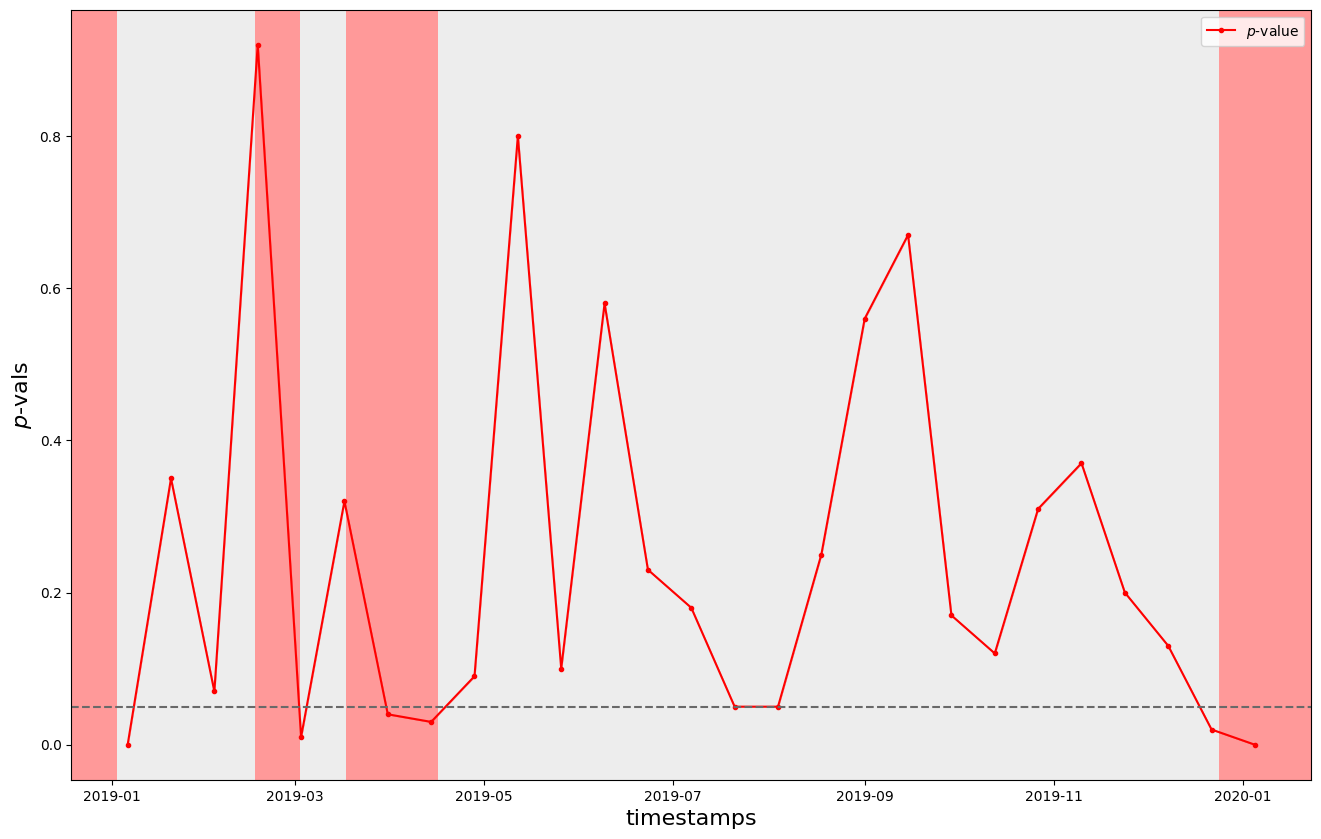

In [6]:
model = DenseNet(weights="densenet121-res224-all")
detector = Detector(
    "rolling_window_drift",
    reductor=Reductor(dr_method="bbse-soft", model=model, device=device),
    tester=TSTester(tester_method="mmd"),
    source_sample_size=200,
    target_sample_size=50,
    timestamp_column="timestamp",
    window_size="2W",
)

results = detector.detect_shift(source_ds, target_ds)
plot_drift_timeseries(results)